# Step 1: Installation and Setup

In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from KAggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d tongpython/cat-and-dog
!unzip /content/cat-and-dog.zip

# Step 3: Building the Model

In [7]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Fitting CNN to images

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [11]:
datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train = datagen.flow_from_directory(directory=train_data_dir,
                                    target_size=(32, 32),
                                    classes=['dogs', 'cats'],
                                    class_mode='binary',
                                    batch_size=20)

test = datagen.flow_from_directory(directory=test_data_dir,
                                    target_size=(32, 32),
                                    classes=['dogs', 'cats'],
                                    class_mode='binary',
                                    batch_size=20)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [13]:
len(train), len(test)

(401, 102)

In [14]:
len(train)*20, len(test)*20

(8020, 2040)

In [15]:
test.batch_size

20

In [20]:
history = model.fit(train, steps_per_epoch=401, epochs=20, validation_data=test, validation_steps=102)

Epoch 1/20
401/401 [==============================] - 28s 71ms/step - loss: 0.1088 - accuracy: 0.9593 - val_loss: 0.7101 - val_accuracy: 0.7647
Epoch 2/20
401/401 [==============================] - 31s 78ms/step - loss: 0.0930 - accuracy: 0.9655 - val_loss: 0.8028 - val_accuracy: 0.7622
Epoch 3/20
401/401 [==============================] - 30s 76ms/step - loss: 0.0859 - accuracy: 0.9676 - val_loss: 0.8335 - val_accuracy: 0.7711
Epoch 4/20
401/401 [==============================] - 29s 71ms/step - loss: 0.0875 - accuracy: 0.9684 - val_loss: 0.8118 - val_accuracy: 0.7538
Epoch 5/20
401/401 [==============================] - 29s 73ms/step - loss: 0.0748 - accuracy: 0.9739 - val_loss: 0.8427 - val_accuracy: 0.7523
Epoch 6/20
401/401 [==============================] - 29s 71ms/step - loss: 0.0697 - accuracy: 0.9761 - val_loss: 0.9071 - val_accuracy: 0.7528
Epoch 7/20
401/401 [==============================] - 28s 71ms/step - loss: 0.0647 - accuracy: 0.9764 - val_loss: 0.9285 - val_accuracy:

# Step 5: Plotting the learning curve

In [23]:
def learning_curve(history, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

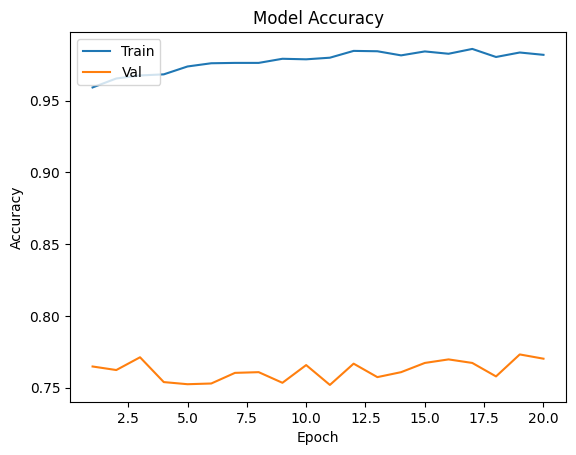

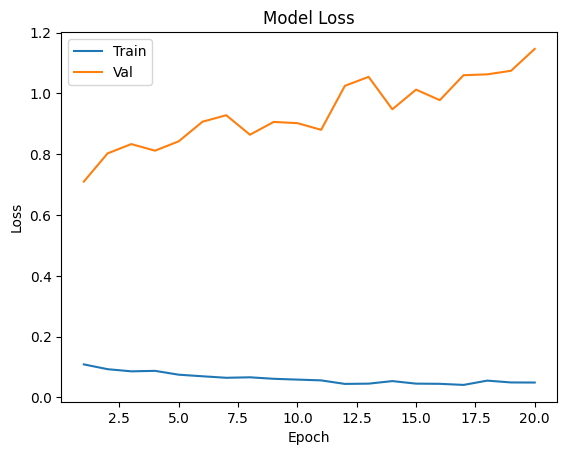

In [24]:
learning_curve(history, 20)